MODULO 1: IMPORTAR, EXPORTAR, GUARDAR. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from scipy import stats

url = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"
data_autos = pd.read_csv(url, header=None)
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
data_autos.columns = headers

#Guardo el archivo:
data_autos.to_csv("C:/Users/Hp/Documents/Python/data_autos.csv",index= False)


In [108]:
#Algunas visualizaciones de los datos:
data_autos.head(5)
data_autos.tail(5)
data_autos.describe()
data_autos[['length','compression-ratio']].describe()
data_autos.dtypes




symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

MODULO 2: PRE PROCESAMIENTO DE DATOS


symboling
0
 
normalized-losses
41
 
make
0
 
fuel-type
0
 
aspiration
0
 
num-of-doors
2
 
body-style
0
 
drive-wheels
0
 
engine-location
0
 
wheel-base
0
 
length
0
 
width
0
 
height
0
 
curb-weight
0
 
engine-type
0
 
num-of-cylinders
0
 
engine-size
0
 
fuel-system
0
 
bore
4
 
stroke
4
 
compression-ratio
0
 
horsepower
2
 
peak-rpm
2
 
city-mpg
0
 
highway-mpg
0
 
price
4
 


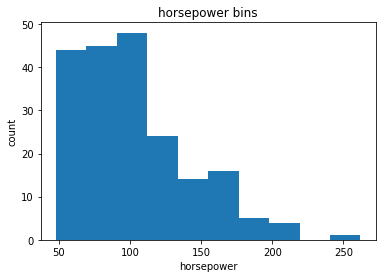

In [27]:
data_autos = pd.read_csv("C:/Users/Hp/Documents/Python/data_autos.csv")

#Analizamos los faltantes de datos:
data_autos.replace("?",np.nan,inplace = True)
data_faltante = data_autos.isnull()
for column in data_faltante:
    print(column)
    print (data_faltante[column].sum())
    print(" ")   

#Eliminamos las filas sin precio:
data_autos.dropna(subset=["price"],axis = 0, inplace = True)

#Remplazamos faltantes por la media cuando correponde:
avg_norm_loss = data_autos["normalized-losses"].astype("float").mean(axis=0)
data_autos["normalized-losses"].replace(np.nan,avg_norm_loss,inplace = True)

avg_stroke = data_autos["stroke"].astype("float").mean(axis=0)
data_autos["stroke"].replace(np.nan,avg_stroke,inplace = True)

avg_bore = data_autos["bore"].astype("float").mean(axis=0)
data_autos["bore"].replace(np.nan,avg_bore,inplace = True)

avg_horsepower = data_autos["horsepower"].astype("float").mean(axis=0)
data_autos["horsepower"].replace(np.nan,avg_horsepower,inplace = True)

avg_peakrpm = data_autos["peak-rpm"].astype("float").mean(axis=0)
data_autos["peak-rpm"].replace(np.nan,avg_peakrpm,inplace = True)

#Remplazamos faltantes en num of doors por 4 que es lo mas comun:
data_autos["num-of-doors"].replace(np.nan,4,inplace = True)

#Corregimos tipos de datos equivocados:
data_autos[["bore", "stroke"]] = data_autos[["bore", "stroke"]].astype("float")
data_autos[["normalized-losses","horsepower"]] = data_autos[["normalized-losses","horsepower"]].astype("int")
data_autos[["price"]] = data_autos[["price"]].astype("float")
data_autos[["peak-rpm"]] = data_autos[["peak-rpm"]].astype("float")

# Convertimos mpg a L/100km: 
data_autos["city-mpg"] = 235/data_autos["city-mpg"]
data_autos.rename(columns={"city-mpg":"city-L/100 km"},inplace = True)

# Nomarlizamos las columnas "length", "width" y "height"
data_autos["length"] = data_autos["length"]/data_autos["length"].max()
data_autos["width"] = data_autos["width"]/data_autos["width"].max()
data_autos["height"] = data_autos["height"]/data_autos["height"].max()

# Ploteamos horsepower para ver como se distribuyen los datos y los agrupamos en 3 categorias:

from matplotlib import pyplot
plt.pyplot.hist(data_autos["horsepower"])
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

bins = np.linspace(min(data_autos["horsepower"]), max(data_autos["horsepower"]), 4)
group_names = ['Low', 'Medium', 'High']
data_autos['horsepower-binned'] = pd.cut(data_autos['horsepower'], bins, labels=group_names, include_lowest=True )

#Tambien podemos plotear la distribucion de los grupos: 
#pyplot.bar(group_names, data_autos["horsepower-binned"].value_counts())
#plt.pyplot.xlabel("horsepower")
#plt.pyplot.ylabel("count")
#plt.pyplot.title("horsepower bins")

#Por ultimo convertimos el tipo de combustible en variables binarias:
variables = pd.get_dummies(data_autos["fuel-type"])
data_autos = pd.concat([data_autos, variables], axis=1)
data_autos.drop("fuel-type", axis = 1, inplace=True)





MODULO 3: ESTADISTICA DESCRIPTIVA


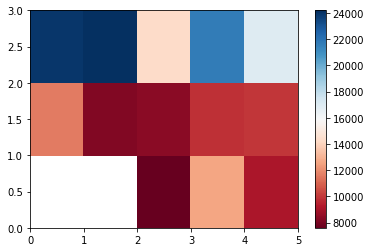

In [19]:
import matplotlib.pyplot as plt

#Sondeo de correlaciones y ploteo de algunos datos:
data_autos[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()  
pearson_coef, p_value = stats.pearsonr(data_autos['wheel-base'], data_autos['price'])

#sns.regplot(x="engine-size", y="price", data=data_autos)
#plt.ylim(0,)

data_autos[["engine-size", "price"]].corr()

#sns.boxplot(x="body-style", y="price", data=data_autos)

data_autos['drive-wheels'].value_counts()

#Agrupamiento:
data_autos['drive-wheels'].unique()
data_autos_agrupado = data_autos[['drive-wheels','body-style','price']]
data_autos_agrupado = data_autos_agrupado.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_pivot = data_autos_agrupado.pivot(index='drive-wheels',columns='body-style')
grouped_pivot
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

In [29]:
pearson_coef, p_value = stats.pearsonr(data_autos['wheel-base'], data_autos['price'])
print(pearson_coef,p_value)

0.5846418222655081 8.076488270732955e-20


In [2]:
data_autos.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
